In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.2749 - acc: 0.9155 - val_loss: 0.0563 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0889 - acc: 0.9746 - val_loss: 0.0429 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0665 - acc: 0.9804 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.0529 - acc: 0.9842 - val_loss: 0.0296 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0467 - acc: 0.9858 - val_loss: 0.0289 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.0424 - acc: 0.9873 - val_loss: 0.0280 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0371 - acc: 0.9891 - val_loss: 0.0301 -

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027218466464714857
Test accuracy: 0.992


In [11]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

In [12]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 300, replace=False)]

In [13]:
print(x_train.shape[0])

60000


In [14]:
print(background.shape)

(300, 28, 28, 1)


In [15]:
# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)

In [16]:
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:10])

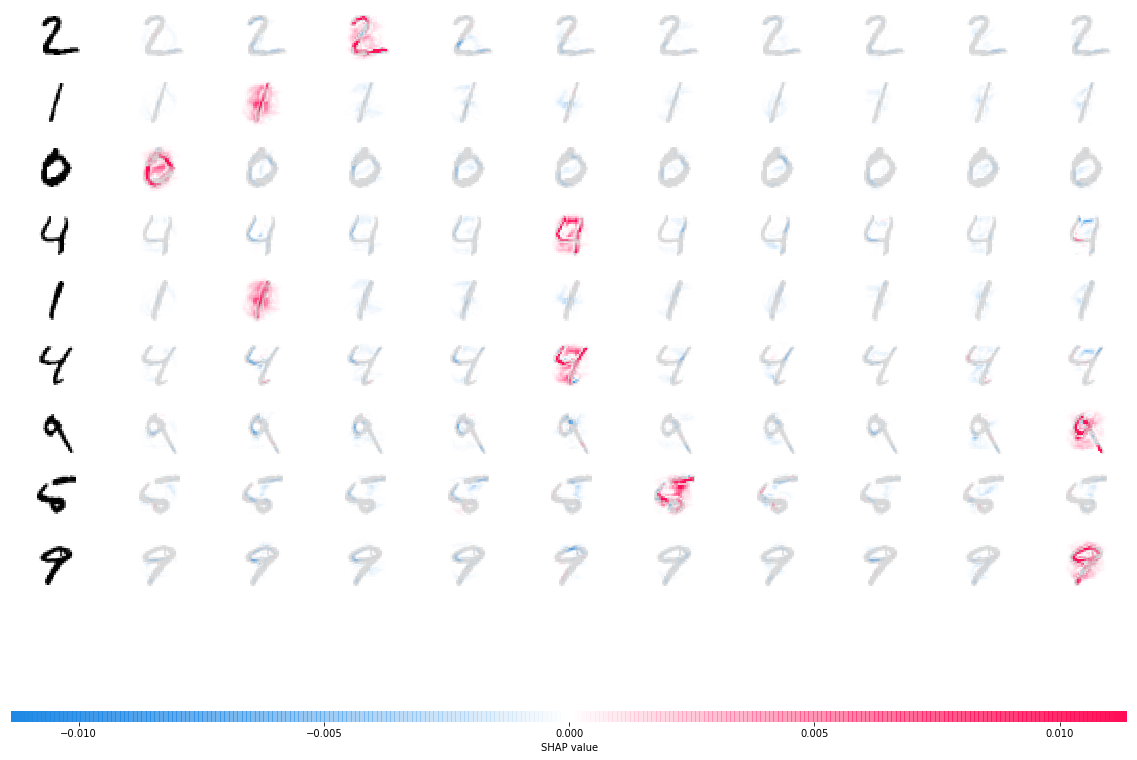

In [17]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:10])